In [1]:
%matplotlib inline

In [53]:
import seaborn as sns

In [47]:
from cue.utils.plotting import *

In [48]:
style()

In [2]:
from cue.model.networks import OneHotCounter

In [71]:
with nengo.Network() as model:
    stimulus = nengo.Node(lambda t: t > 1.)
    pos = OneHotCounter(3)
    nengo.Connection(stimulus, pos.input_inc)
    init = nengo.Node(lambda t: t < 0.03)
    nengo.Connection(init, pos.state.input[0])
    p_stim = nengo.Probe(stimulus)
    p_edge = nengo.Probe(pos.rising_edge_detector, synapse=0.01)
    p_out = nengo.Probe(pos.output, synapse=0.01)
    p_state = nengo.Probe(pos.state.output, synapse=0.01)
    p_adv = nengo.Probe(pos.advance_threshold.output, synapse=0.1)
    p_inh = nengo.Probe(pos.inhibit_threshold.heaviside, synapse=0.01)

In [72]:
with nengo.Simulator(model) as sim:
    sim.run(2.)

Building finished in 0:00:01.                                                                                                                                                                                                                
Simulating finished in 0:00:04.                                                                                                                                                                                                              


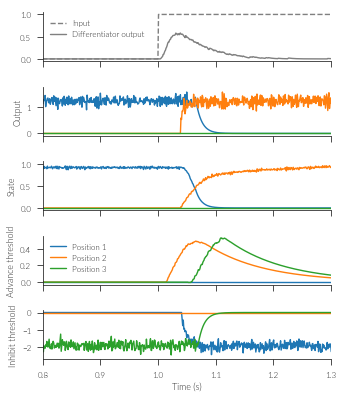

In [79]:
ts = sim.trange()
fig = plt.figure(figsize=(0.9 * textwidth, 2.5 * row_height))

ax1 = fig.add_subplot(5, 1, 1)
ax1.plot(ts, sim.data[p_stim], '--', c='gray', label="Input")
ax1.plot(ts, sim.data[p_edge], c='gray', label="Differentiator output")
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(5, 1, 2, sharex=ax1)
ax2.plot(ts, sim.data[p_out])
ax2.set_ylabel("Output")

ax3 = fig.add_subplot(5, 1, 3, sharex=ax1)
ax3.plot(ts, sim.data[p_state])
ax3.set_ylabel("State")

ax4 = fig.add_subplot(5, 1, 4, sharex=ax1)
tr = 2. * np.roll(np.eye(3), -1, axis=1)
tr[0, -1] = 0.
ax4.plot(ts, sim.data[p_adv] @ tr.T)
ax4.set_ylabel("Advance threshold")
ax4.legend(["Position " + str(i) for i in range(1, 4)], loc='upper left')

ax5 = fig.add_subplot(5, 1, 5, sharex=ax1)
tr = -2. * np.roll(np.eye(3), 1, axis=1)
ax5.plot(ts, sim.data[p_inh] @ tr.T)
ax5.set_ylabel("Inhibit threshold")
ax5.set_xlabel("Time (s)")

ax1.set_xlim(0.8, 1.3)
for ax in fig.axes:
    ax.label_outer()

sns.despine(fig)
fig.tight_layout()

In [80]:
save_tight_fig(fig, '../../../phd-thesis/figures/pos-example.pdf')